In [58]:
from scipy import io
import numpy as np
import mloop.utilities as mlu
import csv 
import matplotlib.pyplot as plt
def read(dir): #Get File structure for more accurate
    mat = io.loadmat(dir)
    return mat


def getCost(training_filename):
    training_dict = mlu.get_dict_from_file(
        training_filename,
    )
    all_cost = mlu.safe_cast_to_array(training_dict['in_costs'])
    allParams = np.array(training_dict['out_params'], dtype=float) 
    allParams = allParams[0:(len(all_cost))]
    return all_cost, allParams

def getExpData(csvFile):
    with open(csvFile, mode = 'r') as dataFile:
        csvReader = csv.DictReader(dataFile)
        Temp, NRb, pkOD = [], [], []
        for line in csvReader:
            Temp.append(float(line['Temperature']))
            NRb.append(float(line['AtomNumber']))
            pkOD.append(float(line['pkOD']))

    return np.array(NRb), np.array(Temp), np.array(pkOD)
ExpDataPath = '/Volumes/ni_lab/KRbLab/M_Loop1.5/Data/9_26T10AsTrained.csv'
LearnerPath = '/Volumes/ni_lab/KRbLab/M_Loop1.5/TransferFolder/M-LOOP_archives/controller_archive_2022-09-26_23-44.txt'
NRb, Temp, pkOD = getExpData(ExpDataPath)
cost, paramsList = getCost(LearnerPath)
n = np.arange(1, len(cost)+1)

In [60]:
import pandas as pd
from rich.console import Console
from rich.table import Table

N1 = 7376000.0*3 #5

alpha = -9/5 #9
def costFinderLit(pkOD, NRb, alpha): #Background N Get File structure for more accurate
    if NRb <= 0:
        return 0
    else:
        Fn = 2/(1 + np.exp(N1/NRb))
        return -Fn*pkOD**3*NRb**(alpha-9/5) *1E7
CostV4 = np.zeros(len(pkOD))
for i, _ in enumerate(pkOD):
    CostV4[i] = costFinderLit(pkOD[i], NRb[i], alpha)


numOfminimum = 25
d = {'minNum': [], 'cost':[], 'N': [], 'pkOD': [], 'T': [], 'param': []}
inds = CostV4.argsort()


d['minNum'] = inds[:numOfminimum]
d['cost'] = CostV4[inds[:numOfminimum]]
d['N'] = NRb[inds[:numOfminimum]]
d['pkOD'] = pkOD[inds[:numOfminimum]]
d['T'] = Temp[inds[:numOfminimum]]
for i in range(numOfminimum):
    d['param'].append(paramsList[inds[i]])
df = pd.DataFrame(data=d)
df.sort_values('T')


/var/folders/f3/j8559wb967j8mzq4yl1lbwnc0000gn/T/ipykernel_45282/2945389900.py:12: RuntimeWarning: overflow encountered in exp
  Fn = 2/(1 + np.exp(N1/NRb))


,minNum,cost,N,pkOD,T,param
22,442,-4.988362e-10,3890000.0,1576.0,1.859,"[10.4122813, 6.08834052, 4.52179166, 2.8435884..."
1,471,-6.589081e-10,4169000.0,1656.0,1.892,"[9.7270775, 6.60634282, 4.34877378, 2.69339422..."
0,433,-6.599541e-10,4288000.0,1632.1,1.968,"[9.61659385, 6.33505278, 4.63206789, 2.5543080..."
20,490,-5.165708e-10,4080000.0,1546.2,1.985,"[10.0540313, 6.406682, 4.83963516, 2.80919513,..."
21,387,-5.064066e-10,4092000.0,1533.3,2.004,"[10.04799906, 6.22699599, 3.94490569, 2.907666..."
17,426,-5.358365e-10,4171000.0,1545.3,2.032,"[9.64177972, 6.42097033, 4.34404924, 2.9922962..."
8,466,-5.952982e-10,4283000.0,1577.9,2.044,"[9.77399073, 6.61002132, 4.31467294, 2.9958732..."
3,469,-6.256365e-10,4359000.0,1590.3,2.056,"[10.0082399, 6.12794287, 4.70639932, 2.5876141..."
9,486,-5.834531e-10,4293000.0,1565.5,2.064,"[10.1598269, 6.30321623, 3.84189105, 2.8368931..."
18,286,-5.272721e-10,4594000.0,1468.1,2.349,"[10.5669758, 5.81653206, 4.46089628, 2.9742498..."


In [62]:
paramsList[435]
#8M4k10secRamp

array([10.03416995,  6.48284474,  4.59027361,  3.08260417,  1.97752854,
       -0.0173826 , -0.05947214, -0.07309813, -0.0677227 , -0.12168008,
        0.04912314,  0.15855452,  0.04804002,  0.01863188,  0.0755633 ,
       -0.02827958,  0.02691244,  0.10905639,  0.16140107,  0.08089859])

[ -1482.78876   -6600.09257   -6807.68155   -5032.38423  -12315.7614
   3665.10528   16017.8905     3732.30601    -199.586981   8564.63907
   -694.100466   3373.62801   10386.3965    18774.515      7811.85733 ]
[20000000.    9949668.87  6395978.88  4233191.19  2834705.89  1952818.69]
[ -1738.26   -5947.214  -7309.813  -6772.27  -12168.008   4912.314
  15855.452   4804.002   1863.188   7556.33   -2827.958   2691.244
  10905.639  16140.107   8089.859]
[20000000.   10034169.95  6482844.74  4590273.61  3082604.17  1977528.54]
[ -3213.88089   -5582.17654   -6225.88628   -5902.62312  -13361.8918
   4606.17637   16209.4779     5173.57794     897.301808   9665.32951
   1014.1425     2416.22798   11617.5684    18533.1084    10045.6773  ]
[20000000.   10184630.2   5892179.11  4092843.09  2630945.78  1988657.62]


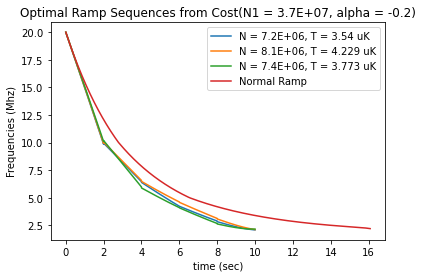

In [56]:
#Plotting Sequences
#Plots Original ramp Sequence
def seqNormal():
    f0 = 20
    fb = 1.785
    fcut = [10, 5, 3, 2.3, 2.21]
    tau = [3.5, 4, 5, 5, 2]
    fstart=fcut[0:len(fcut)-1]
    fstart.insert(0, f0)
    tstage=-np.array(tau)*np.log((np.array(fcut)-fb)/(np.array(fstart)-fb))
    freq = []
    time = []
    t = 0
    for i in range(0, len(tau)):

        Nj=300;
        dt=tstage[i]/Nj;
        for j in range(0, Nj):
            f=(fstart[i]-fb)*np.exp(-j*dt/tau[i])+fb;
            t = t + dt
            freq.append(f)
            time.append(t)
    return time, freq
def plotRamp(params):
    tTotal = 10
    fstart = params[0:5]
    A = np.array(params[5:len(params)])*1E5
    print(A)
    tau = tTotal/len(fstart)*np.ones(len(fstart))
    fstart.insert(0, 20)
    
    fstart = np.array(fstart)*1E6
    print(fstart)
    freq = []
    time = []
    t = 0 
    f = 0
    set = 0 
    for i in range(0, len(tau)):


        Nj=300 
        dt=tau[i]/Nj
        
        A2 = A[set + 0]
        A3 = A[set + 1]
        A4 = A[set + 2]

        for j in range(0, Nj):
            #f=(fstart(i)-fb).*exp(-j.*dt./tau(i))+fb;
            f = fstart[i] + (fstart[i+1] - fstart[i])*j*dt/tau[i] + A2*j*dt*(j*dt - tau[i]) + A3*j*dt*(j*dt-tau[i])*(j*dt + 0.5*tau[i]) + A4*j*dt*(j*dt + 2/3*tau[i])*(j*dt + 1/3*tau[i])
            t = t + dt
            freq.append(f/1E6)
            time.append(t)
        set = set + 3
    return time, freq
totalStates = 3
for i in range(totalStates):
    fstart = list(df['param'][i])

    time, freq= plotRamp(fstart)
    plt.plot(time, freq, label=f"N = {df['N'][i]:.1E}, T = {df['T'][i]} uK")
    
time, freq =   seqNormal()
plt.plot(time, freq, label=f"Normal Ramp")
plt.title(f'Optimal Ramp Sequences from Cost(N1 = {36880000.0:.1E}, alpha = -0.2)')
plt.xlabel('time (sec)')
plt.ylabel('Frequencies (Mhz)')
plt.legend()
plt.show()


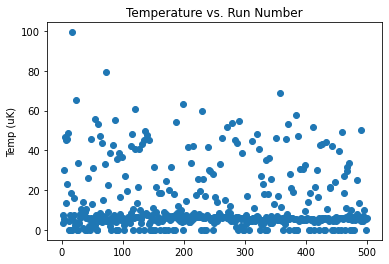

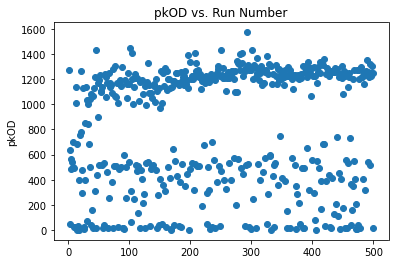

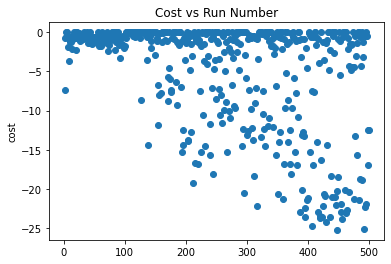

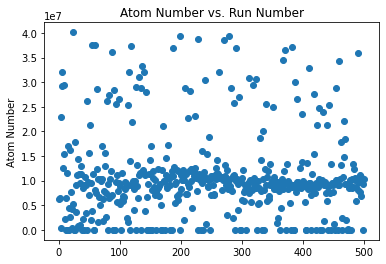

In [18]:

#plt.plot(n, pkOD)
#plt.plot(n, NRb)
plt.title('Temperature vs. Run Number')
plt.ylabel('Temp (uK)')
plt.scatter(n, Temp)
plt.show()
plt.title('pkOD vs. Run Number')
plt.ylabel('pkOD')
plt.scatter(n, pkOD)
plt.show()
plt.title('Cost vs Run Number')
plt.scatter(n, cost)
plt.ylabel('cost')
plt.show()



plt.title('Atom Number vs. Run Number')
plt.ylabel('Atom Number')
plt.scatter(n, NRb)
plt.show()


In [ ]:
import scipy.optimize as opt

def eqOFstate(a, b):
    